#  Micro Credit Defaulter Project

# Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes
very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. 
The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS)
which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long 
for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families 
and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a
global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network 
provider. They have launched various products and have developed its business and organization based on the budget 
operator model, offering better products at Lower Prices to all value conscious customers through a strategy of 
disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their 
services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days.
The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the 
time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to 
improve the selection of customers for the credit, the client wants some predictions that could help them in further 
investment and improvement in selection of customers. 


# importing all the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# load the data set:

In [2]:
df=pd.read_csv('Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# Description:

label-Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn	- mobile number of user	

aon-age on cellular network in days	

daily_decr30-Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	

daily_decr90-Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30-Average main account balance over last 30 days	Unsure of given definition

rental90-Average main account balance over last 90 days	Unsure of given definition

last_rech_date_ma-Number of days till last recharge of main account

last_rech_date_da-Number of days till last recharge of data account	

last_rech_amt_ma-Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30-Number of times main account got recharged in last 30 days	

fr_ma_rech30-Frequency of main account recharged in last 30 days	Unsure of given definition

sumamnt_ma_rech30-Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	

medianamnt_ma_rech30-Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	
medianmarechprebal30-Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	
cnt_ma_rech90-Number of times main account got recharged in last 90 days	

fr_ma_rech90-Frequency of main account recharged in last 90 days	Unsure of given definition

sumamnt_ma_rech90-Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	

medianamnt_ma_rech90-Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)	
medianmarechprebal90-Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)	
cnt_da_rech30-Number of times data account got recharged in last 30 days

fr_da_rech30-Frequency of data account recharged in last 30 days	

cnt_da_rech90-Number of times data account got recharged in last 90 days

fr_da_rech90-Frequency of data account recharged in last 90 days	

cnt_loans30-Number of loans taken by user in last 30 days	

amnt_loans30-Total amount of loans taken by user in last 30 days	

maxamnt_loans30-maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

medianamnt_loans30-Median of amounts of loan taken by the user in last 30 days	

cnt_loans90-Number of loans taken by user in last 90 days	

amnt_loans90-Total amount of loans taken by user in last 90 days

maxamnt_loans90-maximum amount of loan taken by the user in last 90 days	

medianamnt_loans90-Median of amounts of loan taken by the user in last 90 days

payback30-Average payback time in days over last 30 days	

payback90-Average payback time in days over last 90 days	

pcircle-telecom circle	

pdate-date	


In [3]:
df.shape# dimension of the dataset

(209593, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# checking the null count using heat map:

<AxesSubplot:>

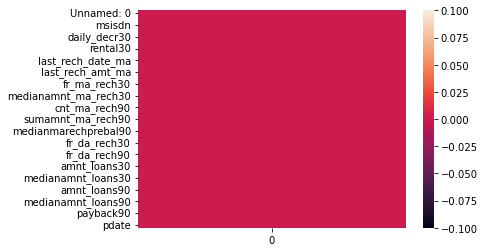

In [6]:
sns.heatmap(df.isnull().sum().to_frame())

# Describing the data

In [7]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# graphical analysis:

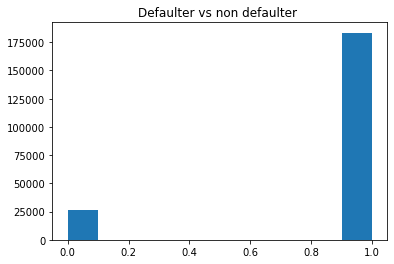

In [8]:
df['label'].hist(grid=False)
plt.title('Defaulter vs non defaulter ')
plt.show()

•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records

# Ordinal encoder:

In [9]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))


In [10]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,40191.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0.0,49.0
1,2,1,142291.0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0.0,70.0
2,3,1,33594.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0.0,79.0
3,4,1,104157.0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0.0,5.0
4,5,1,6910.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,42866.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0.0,16.0
209589,209590,1,178248.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0.0,11.0
209590,209591,1,53995.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0.0,58.0
209591,209592,1,111388.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0.0,54.0


# Correlation Using Heatmap:

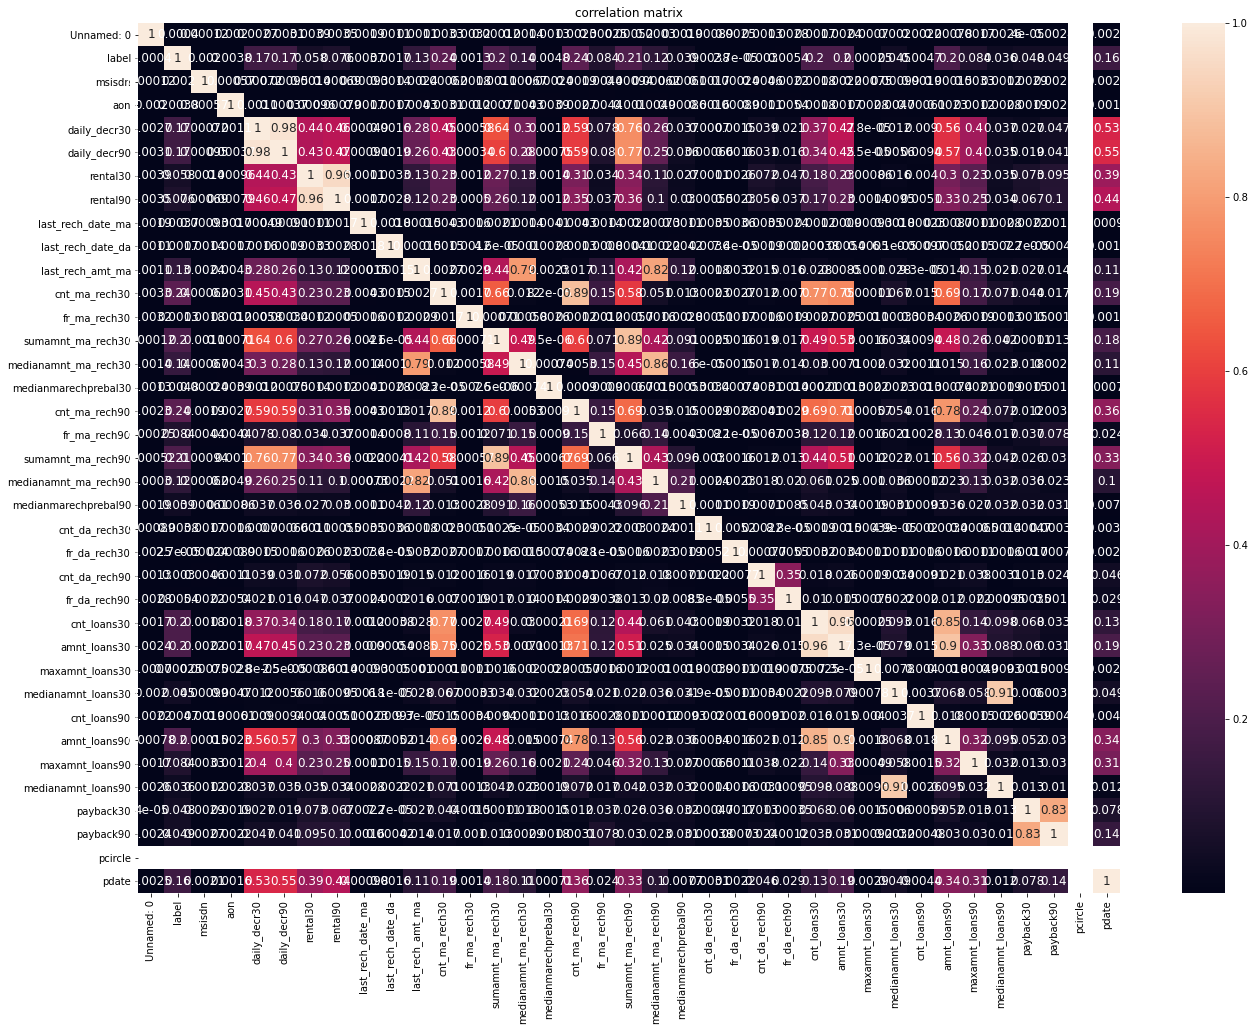

In [12]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

In [11]:
corr=df.corr()
corr['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
pdate                   0.162687
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
msisdn                  0.001976
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0

In [12]:
df=df.drop(columns=['pcircle']) # dropping unwanted columns from the dataset.

# Checking outliers:

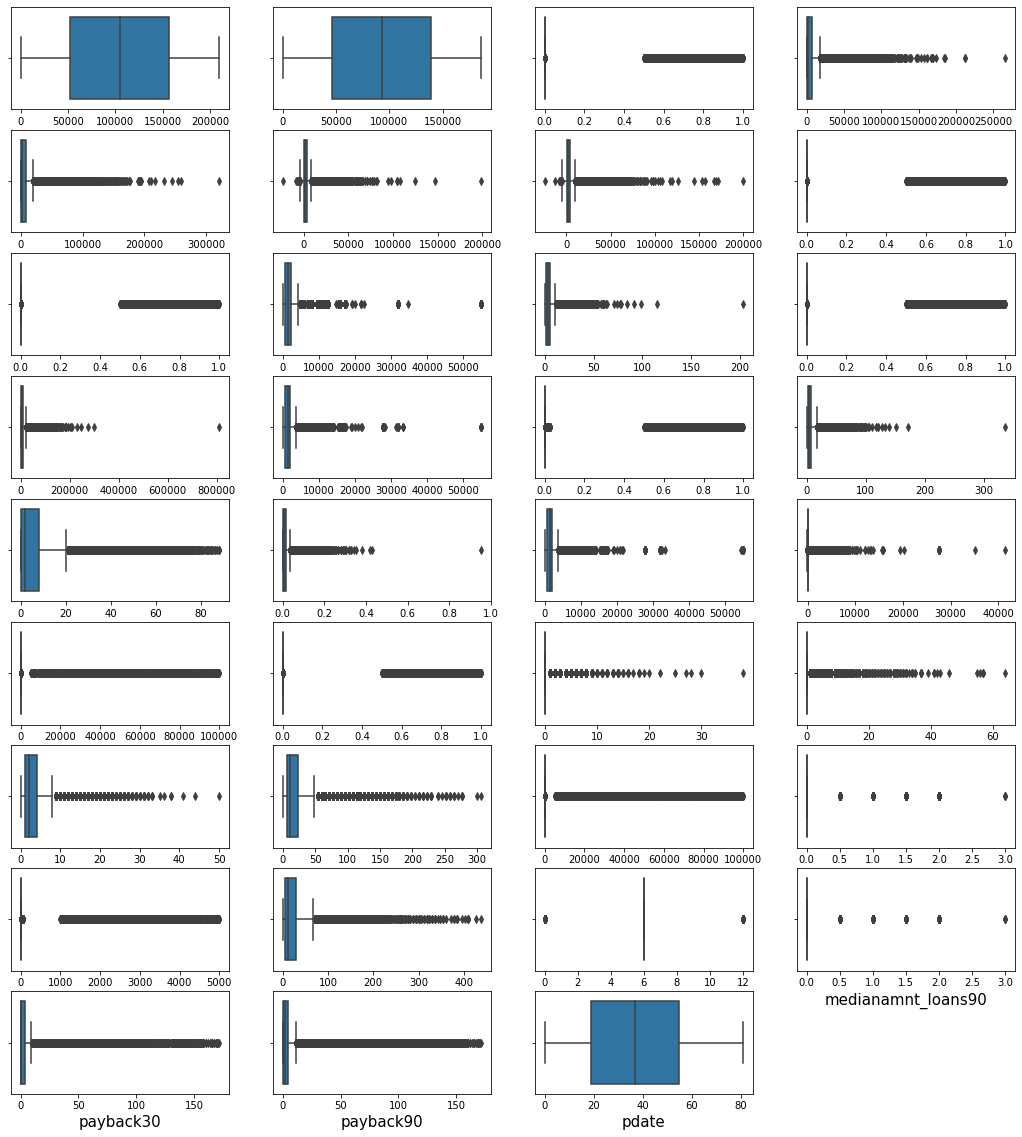

In [17]:
x=df.drop(columns=['label'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=36:
        ax=plt.subplot(9,4,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show() 

# Skewness:

In [18]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90   

# Feature selection method:

In [13]:
from sklearn.feature_selection import SelectKBest,f_classif

x=df.drop('label',axis=1)
y=df.label

best_features=SelectKBest(score_func=f_classif,k=30)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(30,'Score')

,Feature_name,Score
10,cnt_ma_rech30,12510.083303
15,cnt_ma_rech90,12405.460816
17,sumamnt_ma_rech90,9268.913603
12,sumamnt_ma_rech30,8992.357422
29,amnt_loans90,8713.713240
25,amnt_loans30,8486.771736
24,cnt_loans30,8398.510078
3,daily_decr30,6109.541601
4,daily_decr90,5950.192201
34,pdate,5698.062427


In [14]:
feature_scores.nlargest(30,'Score')['Feature_name']

10           cnt_ma_rech30
15           cnt_ma_rech90
17       sumamnt_ma_rech90
12       sumamnt_ma_rech30
29            amnt_loans90
25            amnt_loans30
24             cnt_loans30
3             daily_decr30
4             daily_decr90
34                   pdate
13    medianamnt_ma_rech30
9         last_rech_amt_ma
18    medianamnt_ma_rech90
16            fr_ma_rech90
30         maxamnt_loans90
6                 rental90
5                 rental30
33               payback90
32               payback30
27      medianamnt_loans30
19    medianmarechprebal90
31      medianamnt_loans90
23            fr_da_rech90
14    medianmarechprebal30
28             cnt_loans90
20           cnt_da_rech30
2                      aon
7        last_rech_date_ma
22           cnt_da_rech90
1                   msisdn
Name: Feature_name, dtype: object

# creating a data frame with those best features with target variable label


In [15]:
dfn=df[['cnt_ma_rech30','cnt_ma_rech90','sumamnt_ma_rech90','sumamnt_ma_rech30','amnt_loans90','amnt_loans30','cnt_loans30',
        'daily_decr30','daily_decr90','pdate','medianamnt_ma_rech30','last_rech_amt_ma','medianamnt_ma_rech90','fr_ma_rech90',
        'maxamnt_loans90','rental90','rental30','payback90','payback30','medianamnt_loans30','medianmarechprebal90',
        'medianamnt_loans90','fr_da_rech90','medianmarechprebal30','cnt_loans90','cnt_da_rech30','aon','last_rech_date_ma',
        'cnt_da_rech90','msisdn','label']]
dfn

,cnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,sumamnt_ma_rech30,amnt_loans90,amnt_loans30,cnt_loans30,daily_decr30,daily_decr90,pdate,...,medianamnt_loans90,fr_da_rech90,medianmarechprebal30,cnt_loans90,cnt_da_rech30,aon,last_rech_date_ma,cnt_da_rech90,msisdn,label
0,2,2,3078,3078.0,12,12,2,3055.050000,3065.150000,49.0,...,0.0,0,7.50,2.0,0.0,272.0,2.0,0,40191.0,0
1,1,1,5787,5787.0,12,12,1,12122.000000,12124.750000,70.0,...,0.0,0,61.04,1.0,0.0,712.0,20.0,0,142291.0,1
2,1,1,1539,1539.0,6,6,1,1398.000000,1398.000000,79.0,...,0.0,0,66.32,1.0,0.0,535.0,3.0,0,33594.0,1
3,0,1,947,0.0,12,12,2,21.228000,21.228000,5.0,...,0.0,0,0.00,2.0,0.0,241.0,41.0,0,104157.0,1
4,7,8,23496,20029.0,42,42,7,150.619333,150.619333,21.0,...,0.0,0,29.00,7.0,0.0,947.0,4.0,0,6910.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,3,3,10404,10404.0,12,12,2,151.872333,151.872333,16.0,...,0.0,0,91.81,2.0,0.0,404.0,1.0,0,42866.0,1
209589,4,6,4038,3092.0,18,18,3,36.936000,36.936000,11.0,...,0.0,0,161.30,3.0,0.0,1075.0,4.0,0,178248.0,1
209590,5,11,18592,9334.0,54,42,4,11843.111667,11904.350000,58.0,...,0.0,0,51.13,6.0,0.0,1013.0,3.0,0,53995.0,1
209591,5,6,17941,12154.0,24,18,2,12488.228333,12574.370000,54.0,...,0.0,0,164.00,3.0,0.0,1732.0,2.0,1,111388.0,1


# Removing Outliers using Z score Technique:

In [16]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(dfn)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df1=dfn[filtering_entry]


In [17]:
df1

,cnt_ma_rech30,cnt_ma_rech90,sumamnt_ma_rech90,sumamnt_ma_rech30,amnt_loans90,amnt_loans30,cnt_loans30,daily_decr30,daily_decr90,pdate,...,medianamnt_loans90,fr_da_rech90,medianmarechprebal30,cnt_loans90,cnt_da_rech30,aon,last_rech_date_ma,cnt_da_rech90,msisdn,label
0,2,2,3078,3078.0,12,12,2,3055.050000,3065.150000,49.0,...,0.0,0,7.50,2.0,0.0,272.0,2.0,0,40191.0,0
1,1,1,5787,5787.0,12,12,1,12122.000000,12124.750000,70.0,...,0.0,0,61.04,1.0,0.0,712.0,20.0,0,142291.0,1
2,1,1,1539,1539.0,6,6,1,1398.000000,1398.000000,79.0,...,0.0,0,66.32,1.0,0.0,535.0,3.0,0,33594.0,1
3,0,1,947,0.0,12,12,2,21.228000,21.228000,5.0,...,0.0,0,0.00,2.0,0.0,241.0,41.0,0,104157.0,1
4,7,8,23496,20029.0,42,42,7,150.619333,150.619333,21.0,...,0.0,0,29.00,7.0,0.0,947.0,4.0,0,6910.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,3,3,10404,10404.0,12,12,2,151.872333,151.872333,16.0,...,0.0,0,91.81,2.0,0.0,404.0,1.0,0,42866.0,1
209589,4,6,4038,3092.0,18,18,3,36.936000,36.936000,11.0,...,0.0,0,161.30,3.0,0.0,1075.0,4.0,0,178248.0,1
209590,5,11,18592,9334.0,54,42,4,11843.111667,11904.350000,58.0,...,0.0,0,51.13,6.0,0.0,1013.0,3.0,0,53995.0,1
209591,5,6,17941,12154.0,24,18,2,12488.228333,12574.370000,54.0,...,0.0,0,164.00,3.0,0.0,1732.0,2.0,1,111388.0,1


# Percentage data loss:

In [18]:
loss_percent=(209593-164646 )/209593*100
loss_percent

21.444895583344863

# since there is huge data loss we consider the data set before using zscore technique to build the model.

# Model Building:

In [19]:
x=dfn.drop(columns='label')
y=dfn.label

# Scaling and tranforming x variableto minimize errors:

In [20]:
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')

In [21]:
x=scaler.fit_transform(x.values)

In [22]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

# Creating train-test split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=55)

# Balancing the data set:

In [45]:
import six
import sys
sys.modules['sklearn.external.six']=six
from imblearn.over_sampling import SMOTE

sm=SMOTE()
over_samp=SMOTE(0.80)
x_train,y_train=over_samp.fit_sample(x_train,y_train)

In [46]:
from collections import Counter # to get the count 
print(Counter(y_train))


Counter({1: 146719, 0: 117375})


# KNeighborsClassifier:

In [47]:
from sklearn.metrics import classification_report
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8086309310813712
confusion_matrix: 
 [[ 3752  1455]
 [ 6567 30145]]
classification report:                precision    recall  f1-score   support

           0       0.36      0.72      0.48      5207
           1       0.95      0.82      0.88     36712

    accuracy                           0.81     41919
   macro avg       0.66      0.77      0.68     41919
weighted avg       0.88      0.81      0.83     41919



# DecisionTreeClassifier:

In [48]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8738758081061094
confusion_matrix: 
 [[ 3135  2072]
 [ 3215 33497]]
classification report:                precision    recall  f1-score   support

           0       0.49      0.60      0.54      5207
           1       0.94      0.91      0.93     36712

    accuracy                           0.87     41919
   macro avg       0.72      0.76      0.73     41919
weighted avg       0.89      0.87      0.88     41919



# Logistic Regression:

In [49]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.7795748944392757
confusion_matrix: 
 [[ 3890  1317]
 [ 7923 28789]]
classification report:                precision    recall  f1-score   support

           0       0.33      0.75      0.46      5207
           1       0.96      0.78      0.86     36712

    accuracy                           0.78     41919
   macro avg       0.64      0.77      0.66     41919
weighted avg       0.88      0.78      0.81     41919



# Random Forest Classifier:

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.9138338223717168
confusion_matrix: 
 [[ 3379  1828]
 [ 1784 34928]]
classification report:                precision    recall  f1-score   support

           0       0.65      0.65      0.65      5207
           1       0.95      0.95      0.95     36712

    accuracy                           0.91     41919
   macro avg       0.80      0.80      0.80     41919
weighted avg       0.91      0.91      0.91     41919



# CrossValidation Score:

In [51]:
pred_test=clf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)
for i in range(2,10):
    lsscore=cross_val_score(clf,x,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 92.11948890759105
acc_score- 91.38338223717169
at cv:- 3
cv score- 92.11471777618966
acc_score- 91.38338223717169
at cv:- 4
cv score- 92.15336407753273
acc_score- 91.38338223717169
at cv:- 5
cv score- 92.17626587381758
acc_score- 91.38338223717169
at cv:- 6
cv score- 92.20346046672603
acc_score- 91.38338223717169
at cv:- 7
cv score- 92.19678189674435
acc_score- 91.38338223717169
at cv:- 8
cv score- 92.21252637621797
acc_score- 91.38338223717169
at cv:- 9
cv score- 92.18628448394264
acc_score- 91.38338223717169


In [52]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=8)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.9017953827559995


In [53]:
csv=cross_val_score(clf1,x_scaled,y,cv=8)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.8844093083865738


In [54]:
csv=cross_val_score(lr,x_scaled,y,cv=8)
print('cross validation score of logistic regression model is:',csv.mean())

cross validation score of logistic regression model is: 0.8835982154641995


In [55]:
csv=cross_val_score(clf,x_scaled,y,cv=8)
print('cross validation score of Random forest classifier model is:',csv.mean())

cross validation score of Random forest classifier model is: 0.9219964427798508


# HyperParameterTuning:

In [57]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,15],
            'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }
gri=GridSearchCV(clf,param_grid=params,cv=8,scoring='accuracy')
gri.fit(x_train,y_train)


GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11]},
             scoring='accuracy')

In [58]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [59]:
accuracy_score(y_test,gri_pred)

0.8999976144469095

# Saving the model:

In [60]:
import pickle
filename='microcreditcarddefaulter.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [61]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
41914,1,1
41915,1,1
41916,1,1
41917,1,1
